# Módulo 03: Machine Learning

# Aula 02 - Como máquinas aprendem: prazer, Gradiente Descendente

Fala galera! Tudo bem? Na aula passada, vimos uma introdução ao machine learning - o que é, como funciona, seus termos e alguns exemplos. O objetivo dessa e das próximas aulas será entender o motivo e funcionamento dos principais elementos do aprendizado de máquina. Para entender nosso foco de hoje, vamos resgatar a definição de machine learning de Tom Mitchell mostrada na aula passada: <br>
"*Um programa de computador é dito que **aprende** de uma experiência E em respeito a uma série de tarefas T e medido com uma performance P, se P em T melhora com as experiências E*" <br>
Ok, então já construímos a noção de que o **ato de um algoritmo aprender uma tarefa é o ato de descoberta e reprodução da função interna (mapping) do nosso dataset**. Para descobrir essa função, o algoritmo ajustará seus parâmetros (otimização)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# MQO - Forma Algébrica

$Y = Xβ + e$

$β = (X^T X)^{-1} X^T Y$

Onde:
- β é o **vetor** de pesos (nossos parâmetros estimados)
- X é a matriz de valores, onde cada linha é uma observação e cada coluna é uma variável
- o Sobrescrito T indica "Transposto", ou seja, a matriz com um T é a matriz transposta.
- y é simplesmente o vetor da variável y.

Legal, e como fazemos isso?

In [5]:
data = pd.read_csv(r'train.csv')

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
data.shape

(1460, 81)

In [21]:
x = data['GrLivArea']
y = data['SalePrice']

In [22]:
x.head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [23]:
x = (x - x.mean()) / x.std() # normalizando
x.head()

0    0.370207
1   -0.482347
2    0.514836
3    0.383528
4    1.298881
Name: GrLivArea, dtype: float64

In [24]:
x.shape

(1460,)

In [25]:
temp = np.c_[np.ones(1460), x]

In [26]:
x = np.c_[np.ones(x.shape[0]), x] # colocando uma "coluna de 1s" (será nosso $\beta_0$)
x

array([[ 1.        ,  0.37020659],
       [ 1.        , -0.48234664],
       [ 1.        ,  0.51483616],
       ...,
       [ 1.        ,  1.56910958],
       [ 1.        , -0.83250243],
       [ 1.        , -0.49376477]])

In [19]:
w = np.zeros(x.shape[1])

z = np.linalg.inv(np.dot(x.T, x))

w = np.dot(z, np.dot(x.T, y))

LinAlgError: Singular matrix

In [28]:
b, w1 = w[0], w[1]

print('Inclinação: %.2f' % w1)
print('Intercepto: %.2f' % b)

Inclinação: 0.00
Intercepto: 0.00


In [29]:
# Vamos checar com nosso statsmodel
import statsmodels.formula.api as smf

data['GrLivArea_norm'] = (data['GrLivArea']-data['GrLivArea'].mean())/data['GrLivArea'].std()

def run_regression(df,function):
    model = smf.ols(function, df).fit()
    print(model.summary())
    
run_regression(data,'''SalePrice ~ GrLivArea_norm''')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 06 May 2019   Prob (F-statistic):          4.52e-223
Time:                        19:26:25   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.809e+05   1467.490    123.

# Mas cade a tal minimização dos erros quadraticos que tanto falamos?

#### Erros Quadraticos Médios (MSE, Mean Squared Error)
$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y_i - \hat{y_i}\big)^2$$


E é aqui que entra a ideia do gradiente descendente!

Ele é um método genérico de otimização, mesmo que sua matriz não seja invertivel (um pré-requisito do método algébrico) e principalmente se você quiser outras funções de custos mais complexas que o erro quadratico (que vamos ver em machine learning mas não vamos estimar na mão), precisamos usar esse tipo de metodologia. Fazendo uma analogia, resolver algébricamente é como resolver um exercicio de probabilidade coma  fórmula da distribuição, funciona muito bem para casos simples quando você conhece a distribuição, em casos mais complicados precisamos gerar uma simulação (genéricamente, uma "simulação de monte carlo") que funciona para qualquer distribuição, nesse nosso caso é a mesma coisa, o método algébrico é que que tem a maior probabilidade do beta estimado chegar no beta verdadeiro SE seguirmos diversas hipóteses muito duras que quase nunca são cumpridas. 

Ao usar o método dos mínimos quadrados, assumimos algumas premissas a respeito das variáveis:

- **Os regressores são fixos**: As variáveis da matriz $ X\,\!$  não são estocásticas.

- **Erro é aleatório com média 0**: O erro $ \varepsilon \,\!$  é aleatório e sua esperança $ E\left(\varepsilon \right)=0\,\! $ 

- **Homoscedasticidade**: A variância do erro é constante.

- **Sem correlação**: Não existe correlação entre os erros das observações, ou seja, $ E\left(\varepsilon _{i}\varepsilon _{j}\right)=0\,\!$  para qualquer $ i\neq j\,\! $

- **Parâmetros são constantes**: $ \alpha \,\!$  e $ \beta \,\!$  são valores fixos desconhecidos.

- **Modelo é linear**: Os dados da variável dependente $ y\,\!y\,\!$ foram gerados pelo processo linear $ y=X\beta +\epsilon \,\! $

- **Erro tem distribuição normal**: O erro é distribuído conforme a curva de distribuição normal.


Caso alguma dessas premissas não seja verdadeira, o método pode gerar resultados sub-ótimos ou com viés.



# Conceitos básicos.

Suponha que você queira escalar uma colina muito alta. Seu objetivo é chegar ao topo da colina mais rápido. Você olha em volta e percebe que tem mais de um caminho para começar. Já que você está no fundo, todas essas opções parecem levá-lo um pouco mais perto do cume.

<img src="images/4hi5cD92Lw2AhFg5nWuvFFp7.gif">

Mas você quer chegar ao topo da maneira mais rápida possível. Então, como você pode fazer isso? Como você pode dar um passo que leva você o mais perto possível do topo?

É ai que a ideia de gradiente nos ajuda! Em termos minimamente técnicos, o gradiente é a taxa de variação de uma função multivariada, mais técnicamente são as derivadas parciais dessa função. Na nossa montanha ele será nossa **bussola** que aponta para o caminho que nos leva mais rápido para o topo da montanha, basicamente o caminho que tem as maiores inclinações.

Vamos ilustrar com um exemplo:

Tome a função f (x) = x² como um exemplo. A derivada de f (x) é outra função f '(x) que calcula a inclinação de f (x) em um determinado ponto x. Nesta situação, para x = 2, a inclinação de f (x) = x² é 2x ou 2 * 2 = 4.

<img src="images/1_J-TbI94E1nXNHIubJc7VeQ.png">

No nosso caso, o gradiente será um vetor onde cada elemento é a taxa de variação de cada variável que passarmos (ou seja, suas derivadas parciais em um ponto).

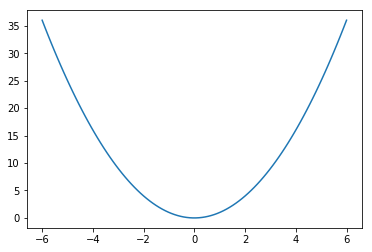

In [30]:
%matplotlib inline

x_aux = [item for item in np.linspace(-6,6,100)]
y_aux = [item**2 for item in x_aux]
plt.plot(x_aux,y_aux)

In [44]:
def derive(func, x, eps=10**(-9)):
    if func(x):
        return (func(x+eps)-func(x-eps))/(2*eps)  #Definição de derivada segundo a definição de LIMITE

derive(lambda w: (w)**2, 4)

8.000000661922968

In [47]:
# def nova_funcao(x):
#     return x**2

In [60]:
def derive(func, x, eps=0.0000000001):
    if func(x):
        return (func(x+eps)-func(x-eps))/(2*eps)  #Definição de derivada segundo a definição de LIMITE

derive(lambda w: (w)**2, -2)

-4.000000330961484


# Como colocamos o Gradiente no problema de regressão linear?

Vamos fazer um paralelo com a escalada.

- **Objetivo** Na escalada o objetivo é chegar na altura máxima, no caso da montanha o cume. Em uma regressão nosso objetivo é tentar explicar ao máximo a relação linear, então nosso "cume" é o $R^2$ (ou analogamente, minimizar os erros quadraticos médios, **MSE**,  que tem o mesmo significado).


- **Ponto de Inicio** Na escalada dependendo do ponto de inicio podemos ter caminhos diferentes até o topo, no gradiente descendente também, então sortearemos um ponto dentro dos possíveis e o chamaremos de **theta**.


- **Tamanho do passo** Na escalada o tamanho do seu passo é sempre mais ou menos igual e não faz muita diferença, em gradiente descendente o tamanho do passo é virtual então teóricamente você poderia dar um passo de 1km e ultrapassar o ponto de máximo (ou de minimo) e nunca conseguir encontra-lo se o passo for muito grande, mas com passos pequenos pode ser que você demore MUITO para chegar até o topo, chamaremos o passo de **alpha**


- **Quantidade de passos** Em uma escalada podemos dizer que temos um tempo limite para chegar ao nosso objetivo, se passarmos um mês tentando subir, desistimos e dizemos que nosso melhor resultado foi na altura y máxima que alcançamos, no caso do gradiente definimos um número de passos máximo para não rodarmos eternamente ou chegarmos no topo e ficarmos andando em voltas lá em cima, a isso damos o nome de **interações**


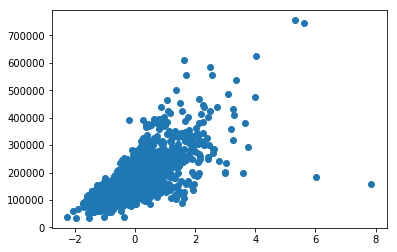

In [61]:
plt.scatter(x=data['GrLivArea_norm'], y=y)

**Hypothesis**: hβ(x)=βTx

**Loss**: (hβ(x)−y)

**Gradient**: (hβ(x)−y)xj

**Gradient Descent Updation**: βj:=βj−α(hβ(x)−y)xj)

In [63]:
np.random.seed(123) # Vamos fixar o seed para ter reprodutibilidade

In [85]:
alpha = 0.01 # Tamanho do passo de cada iteração
iterations = 250 # Número de iterações
m = y.size # Tamanho do nosso dataset
# theta = np.random.rand(2) # Vamos sortear dois pontos qualquer para ser nosso ponto de partida, eles representam nosso b0 e b1
theta = np.array([70000,-50000])

In [86]:
%%time

def gradient_descent(x, y, theta, iterations, alpha):
    list_costs = [] # Adicionaremos os valores dos custos de cada passo
    
    list_thetas = [theta] # esses thetas são nossas estimativas de b0 e b1, começando pela theta aleatório
    
    for i in range(iterations):
        
        prediction = np.dot(x, theta) # vamos pegar o b0 e b1 e prever todos os valores
        
        error = prediction - y # vamos calcular a distância do previsto para o real
        
        cost = 1/(2*m) * np.dot(error.T, error) # Aqui calculamos o MSE de forma algébrica
        
        list_costs.append(cost) # adicionamos esse MSE na nossa lista de custo.
        
        gradient = np.dot(x.T, error) # calculo do gradiente é o produto escalar entre x e o erro calculado.
        
        theta = theta - (alpha * (1/m) * gradient) # Damos um "passo" em direção

        # ao negativo do gradiente (o gradiente aponta para o máximo, o negativo para o minimo)
        # como queremos MINIMIZAR o custo, pegamos o theta original e damos um pequeno passo em 
        # direção aos gradientes, as taxas de variações de todas as variáveis, que minimizam
        
        list_thetas.append(theta)

    return list_thetas, list_costs

#Pass the relevant variables to the function and get the new values back...
list_thetas, list_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = list_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 171930.09, 47663.88
Wall time: 41.9 ms


Inclinação: 56294.90
Intercepto: 180921.20

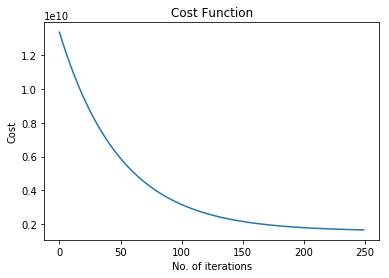

In [87]:
#Plot the cost function...
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(list_costs)
plt.show()

Basicamente o que a função está representando é que no inicio da otimização é possível grandes ajustes  (o passo multiplicado por uma diferença de betas muito grande) por isso o inicio da curva de custo é bastante ingreme e conforme vamos convergindo para o $\beta_0$  e $\beta_1$ que minimizam o $R^2$ a curva vai ficando cade vês menos ingreme conforme esquema simplicado abaixo:

<img src="images/1_WGHn1L4NveQ85nn3o7Dd2g.png">


In [88]:
import matplotlib
print(matplotlib.get_backend())

# provavelmente dará esse problema se seu sistema for windows e precisará instalar o imagemagick

module://ipykernel.pylab.backend_inline


In [89]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, iterations)
    y = list_thetas[i][1]*x + list_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (list_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=iterations-1, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 15)


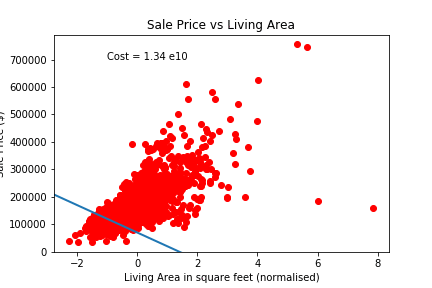

In [90]:
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# Outras formas de visualizar

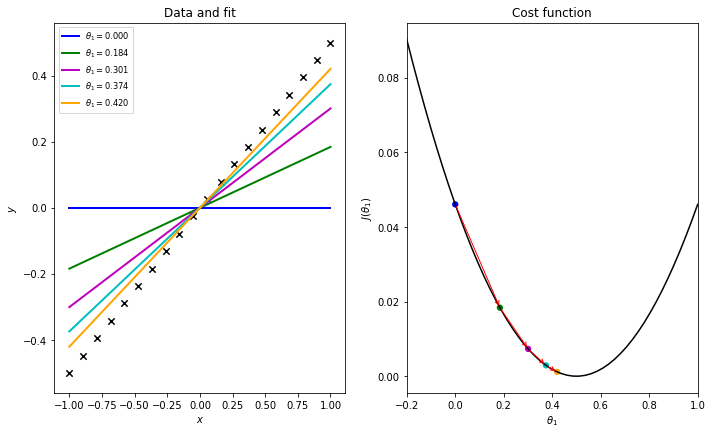

In [91]:
# The data to fit
m = 20
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
ax[1].plot(theta1_grid, J_grid, 'k')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5
alpha = 1
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum(
                                    (hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, theta1[0]), color=colors[0], lw=2,
           label=r'$\theta_1 = {:.3f}$'.format(theta1[0]))
for j in range(1,N):
    ax[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, theta1[j]), color=colors[j], lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

# Labels, titles and a legend.
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
ax[0].legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

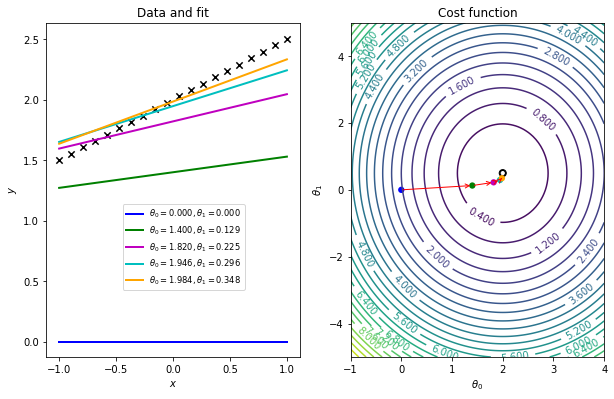

In [92]:

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()

### Na Imagem acima que relaciona beta0 e beta1, plotamos uma imagem de 3 dimensões em 2 usando as curvas de nível como uma dimensão, abaixo uma imagem em 3d onde um dos eixos é o custo:

<img src="images/1_f9a162GhpMbiTVTAua_lLQ.png">

### Por último, basta dizer que existem MUITAS variações do gradiente descendente e quase todas já implementadas pelos algoritmos de machine learning.

<img src="images/0_sFYJwQCCjOnXpSoD.png">

<video controls src="images/otimizacao1.mp4" />

<video controls src="images/otimizacao2.mp4" />

# Apêndice

Para ampliar o endentimento do Gradiente Descendente, apresentamos um dídeo explicativo com as teorias que envolvem o conceito, amparadas por exemplos de redes computacionais capazes de minimizar os erros quadráticos e atingir os pontos de mínimo das funções de erro.

In [93]:
from IPython.display import HTML

HTML('<<iframe width="640" height="360" src="https://www.youtube.com/embed/IHZwWFHWa-w" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>>')